<a href="https://colab.research.google.com/github/Zekrom0506/Centralized-repository-shipping_calculations/blob/main/TP4_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Perceptron : Implementation for Breast Cancer Classification

### Objective:
- Understand how the Perceptron algorithm works.
- Implement Perceptron step by step from scratch.
- Train the model using the Wisconsin Breast Cancer Dataset.
- Evaluate its performance.


### Load and Prepare the Dataset

In [6]:
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = malignant, 1 = benign)

NameError: name 'x' is not defined

**Q1.** Convert labels to -1 and +1

In [3]:
# Original: 0 = malignant, 1 = benign
# We want: -1 = malignant, +1 = benign

y = 2 * y - 1  # This converts: 0→-1, 1→+1

# How?
# If y = 0: 2*0 - 1 = -1
# If y = 1: 2*1 - 1 = +1

print(f"Original first 5 labels: {data.target[:5]}")
print(f"Converted first 5 labels: {y[:5]}")

Original first 5 labels: [0 0 0 0 0]
Converted first 5 labels: [-1 -1 -1 -1 -1]


**Q2.** Normalize features

In [4]:
# Normalization formula: (value - min) / (max - min)
# This squeezes all values between 0 and 1

X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# axis=0 means "do this for each column (feature) separately"

print(f"Before normalization - Feature 1 range: {X[:, 0].min()} to {X[:, 0].max()}")
print(f"After normalization - Feature 1 range: {X_normalized[:, 0].min()} to {X_normalized[:, 0].max()}")

# Update X to use normalized version
X = X_normalized

Before normalization - Feature 1 range: 6.981 to 28.11
After normalization - Feature 1 range: 0.0 to 1.0


**Q3.** Split into training (80%) and test (20%) sets (X_train, X_test, y_train, y_test)

In [7]:
from sklearn.model_selection import train_test_split

# test_size=0.2 means 20% for testing, 80% for training
# random_state=42 ensures we get the same split every time (reproducibility)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")

Total samples: 569
Training samples: 455
Test samples: 114
Number of features: 30


### Initialize Perceptron Parameters

**Q4.** Write a function ```initialize_weights(n_features)``` which allow you to initialize the weights to zero

In [8]:
import numpy as np

def initialize_weights(n_features):
    """
    Create a weight for each feature, starting at 0

    Args:
        n_features: number of input features

    Returns:
        weights: array of zeros with shape (n_features,)
    """
    weights = np.zeros(n_features)
    return weights

# Example:
# If we have 3 features, weights = [0, 0, 0]

**Q5.** Set a learning rate, weights (by using initialize_weights()) and bias.

In [9]:
# Learning rate: typically between 0.001 and 0.1
learning_rate = 0.01

# Initialize weights (one for each feature)
n_features = X_train.shape[1]  # Number of columns = number of features
weights = initialize_weights(n_features)

# Initialize bias to 0
bias = 0

print(f"Number of features: {n_features}")
print(f"Learning rate: {learning_rate}")
print(f"Initial weights shape: {weights.shape}")
print(f"Initial bias: {bias}")

Number of features: 30
Learning rate: 0.01
Initial weights shape: (30,)
Initial bias: 0


### Implement Perceptron Training Algorithm

**Q6.** Write the function ```train_perceptron(X, y, weights, bias, learning_rate, epochs)```

Parameters:

- X: numpy array of shape (n_samples, n_features) -> Training data
- y: numpy array of shape (n_samples,) -> Target labels (+1 or -1)
- weights: numpy array of shape (n_features,) -> Initial weights
- bias: float -> Initial bias
- learning_rate: float -> Step size for weight updates
- epochs: int -> Number of iterations over the dataset

Returns:
    
- weights: Updated weight vector
- bias: Updated bias term

In [10]:
def train_perceptron(X, y, weights, bias, learning_rate, epochs):
    """
    Train the perceptron by adjusting weights and bias

    The algorithm:
    1. For each epoch (full pass through data):
       2. For each training example:
          3. Make a prediction
          4. If wrong, update weights and bias

    Args:
        X: training data (samples × features)
        y: true labels (-1 or +1)
        weights: current weights
        bias: current bias
        learning_rate: how much to adjust
        epochs: how many times to go through all data

    Returns:
        weights: trained weights
        bias: trained bias
    """

    for epoch in range(epochs):
        errors = 0  # Count mistakes in this epoch

        # Go through each training example
        for i in range(len(X)):
            # Get one sample and its true label
            x_i = X[i]
            y_i = y[i]

            # STEP 1: Make prediction
            # Formula: prediction = sign(weights · x + bias)
            linear_output = np.dot(weights, x_i) + bias

            # Sign function: if > 0 return +1, else return -1
            if linear_output > 0:
                prediction = 1
            else:
                prediction = -1

            # STEP 2: Check if prediction is wrong
            if prediction != y_i:
                errors += 1

                # STEP 3: Update weights and bias
                # Update rule:
                #   weights = weights + learning_rate × y_i × x_i
                #   bias = bias + learning_rate × y_i

                weights = weights + learning_rate * y_i * x_i
                bias = bias + learning_rate * y_i

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Errors: {errors}")

    return weights, bias

# Let me explain the update rule:
# - If we predict +1 but true is -1: we predicted too high, so DECREASE weights
# - If we predict -1 but true is +1: we predicted too low, so INCREASE weights
# - y_i * x_i gives us the right direction to adjust

**Q7.** Train the Perceptron using 50 epochs.

In [11]:
# Set number of epochs (complete passes through training data)
epochs = 50

print("Starting training...\n")

# Train the model
weights, bias = train_perceptron(
    X_train, y_train, weights, bias, learning_rate, epochs
)

print("\nTraining complete!")
print(f"Final weights (first 5): {weights[:5]}")
print(f"Final bias: {bias}")

Starting training...

Epoch 10/50 - Errors: 169
Epoch 20/50 - Errors: 169
Epoch 30/50 - Errors: 169
Epoch 40/50 - Errors: 169
Epoch 50/50 - Errors: 169

Training complete!
Final weights (first 5): [9.029e-02 1.733e-01 5.879e-01 2.505e+00 1.066e-03]
Final bias: 0.01


### Make Predictions

**Q8.** Write the ```predict(X, weights, bias)``` function using the <ins>sign activation function</ins> and use it to classify the ```X_test``` set.

In [12]:
def predict(X, weights, bias):
    """
    Make predictions for multiple samples

    Args:
        X: data to predict (can be multiple samples)
        weights: trained weights
        bias: trained bias

    Returns:
        predictions: array of +1 or -1
    """
    # Calculate linear output for all samples at once
    linear_output = np.dot(X, weights) + bias

    # Apply sign function: if > 0 return +1, else -1
    predictions = np.where(linear_output > 0, 1, -1)

    return predictions

# Make predictions on test set
y_pred = predict(X_test, weights, bias)

print(f"Predictions (first 10): {y_pred[:10]}")
print(f"True labels (first 10): {y_test[:10]}")

Predictions (first 10): [1 1 1 1 1 1 1 1 1 1]
True labels (first 10): [1 0 0 1 1 0 0 0 1 1]


## Evaluate Performance

**Q9.** Calculate accuracy.

In [13]:
# Count how many predictions match true labels
correct = np.sum(y_pred == y_test)
total = len(y_test)

accuracy = correct / total

print(f"Correct predictions: {correct}/{total}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Alternative using sklearn:
from sklearn.metrics import accuracy_score
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f"Accuracy (sklearn): {accuracy_sklearn * 100:.2f}%")

Correct predictions: 71/114
Accuracy: 62.28%
Accuracy (sklearn): 62.28%


**Q10.** Display a confusion matrix.

Confusion Matrix:
[[ 0 43]
 [ 0 71]]

Interpretation:
True Negatives (correctly predicted malignant): 0
False Positives (predicted benign, actually malignant): 43
False Negatives (predicted malignant, actually benign): 0
True Positives (correctly predicted benign): 71


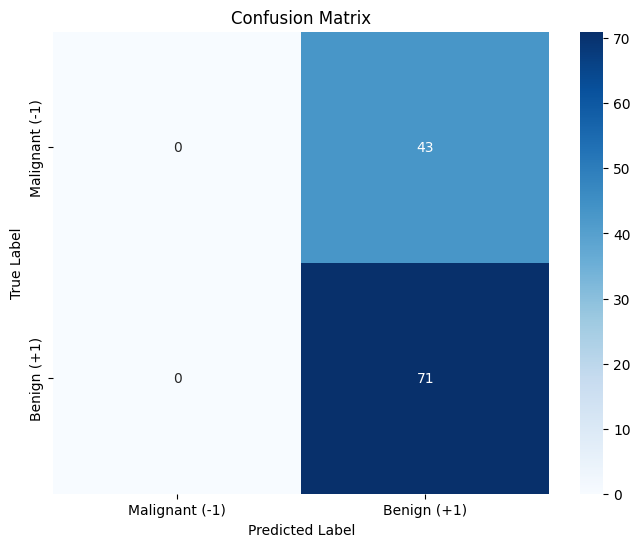

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (correctly predicted malignant): {cm[0, 0]}")
print(f"False Positives (predicted benign, actually malignant): {cm[0, 1]}")
print(f"False Negatives (predicted malignant, actually benign): {cm[1, 0]}")
print(f"True Positives (correctly predicted benign): {cm[1, 1]}")

# Visualize it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant (-1)', 'Benign (+1)'],
            yticklabels=['Malignant (-1)', 'Benign (+1)'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

## Experiment and Improve

**Q11.** Change the learning rate and observe its effect on convergence.

In [15]:
# Let's try different learning rates
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]

results = []

for lr in learning_rates:
    print(f"\n{'='*50}")
    print(f"Testing learning rate: {lr}")
    print('='*50)

    # Reset weights and bias
    weights_test = initialize_weights(n_features)
    bias_test = 0

    # Train
    weights_test, bias_test = train_perceptron(
        X_train, y_train, weights_test, bias_test, lr, epochs=50
    )

    # Predict and evaluate
    y_pred_test = predict(X_test, weights_test, bias_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    results.append({'learning_rate': lr, 'accuracy': accuracy_test})
    print(f"Accuracy: {accuracy_test * 100:.2f}%")

# Show summary
print("\n" + "="*50)
print("SUMMARY")
print("="*50)
for result in results:
    print(f"Learning Rate: {result['learning_rate']:.3f} → Accuracy: {result['accuracy']*100:.2f}%")

# What you might observe:
# - Too small (0.001): learns slowly, might need more epochs
# - Just right (0.01-0.1): good balance
# - Too large (0.5): might overshoot and oscillate


Testing learning rate: 0.001
Epoch 10/50 - Errors: 169
Epoch 20/50 - Errors: 169
Epoch 30/50 - Errors: 169
Epoch 40/50 - Errors: 169
Epoch 50/50 - Errors: 169
Accuracy: 62.28%

Testing learning rate: 0.01
Epoch 10/50 - Errors: 169
Epoch 20/50 - Errors: 169
Epoch 30/50 - Errors: 169
Epoch 40/50 - Errors: 169
Epoch 50/50 - Errors: 169
Accuracy: 62.28%

Testing learning rate: 0.05
Epoch 10/50 - Errors: 169
Epoch 20/50 - Errors: 169
Epoch 30/50 - Errors: 169
Epoch 40/50 - Errors: 169
Epoch 50/50 - Errors: 169
Accuracy: 62.28%

Testing learning rate: 0.1
Epoch 10/50 - Errors: 169
Epoch 20/50 - Errors: 169
Epoch 30/50 - Errors: 169
Epoch 40/50 - Errors: 169
Epoch 50/50 - Errors: 169
Accuracy: 62.28%

Testing learning rate: 0.5
Epoch 10/50 - Errors: 169
Epoch 20/50 - Errors: 169
Epoch 30/50 - Errors: 169
Epoch 40/50 - Errors: 169
Epoch 50/50 - Errors: 169
Accuracy: 62.28%

SUMMARY
Learning Rate: 0.001 → Accuracy: 62.28%
Learning Rate: 0.010 → Accuracy: 62.28%
Learning Rate: 0.050 → Accuracy:

**Q12.** Increase the number of epochs and check if accuracy improves.


Testing with 10 epochs
Epoch 10/10 - Errors: 169
Accuracy: 62.28%

Testing with 30 epochs
Epoch 10/30 - Errors: 169
Epoch 20/30 - Errors: 169
Epoch 30/30 - Errors: 169
Accuracy: 62.28%

Testing with 50 epochs
Epoch 10/50 - Errors: 169
Epoch 20/50 - Errors: 169
Epoch 30/50 - Errors: 169
Epoch 40/50 - Errors: 169
Epoch 50/50 - Errors: 169
Accuracy: 62.28%

Testing with 100 epochs
Epoch 10/100 - Errors: 169
Epoch 20/100 - Errors: 169
Epoch 30/100 - Errors: 169
Epoch 40/100 - Errors: 169
Epoch 50/100 - Errors: 169
Epoch 60/100 - Errors: 169
Epoch 70/100 - Errors: 169
Epoch 80/100 - Errors: 169
Epoch 90/100 - Errors: 169
Epoch 100/100 - Errors: 169
Accuracy: 62.28%

Testing with 200 epochs
Epoch 10/200 - Errors: 169
Epoch 20/200 - Errors: 169
Epoch 30/200 - Errors: 169
Epoch 40/200 - Errors: 169
Epoch 50/200 - Errors: 169
Epoch 60/200 - Errors: 169
Epoch 70/200 - Errors: 169
Epoch 80/200 - Errors: 169
Epoch 90/200 - Errors: 169
Epoch 100/200 - Errors: 169
Epoch 110/200 - Errors: 169
Epoch 

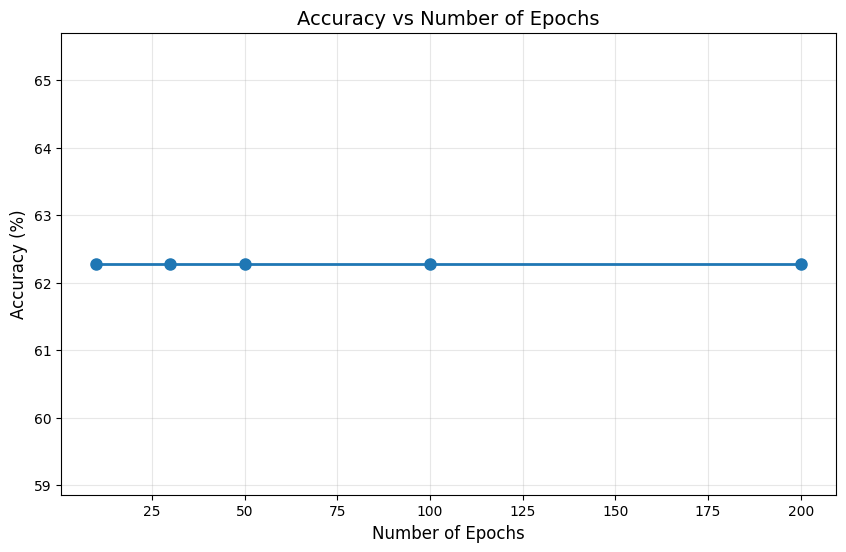


SUMMARY
Epochs:  10 → Accuracy: 62.28%
Epochs:  30 → Accuracy: 62.28%
Epochs:  50 → Accuracy: 62.28%
Epochs: 100 → Accuracy: 62.28%
Epochs: 200 → Accuracy: 62.28%


In [16]:
# Let's try different numbers of epochs
epoch_values = [10, 30, 50, 100, 200]

results_epochs = []

# Use the learning rate that worked best from Q11
best_lr = 0.01

for n_epochs in epoch_values:
    print(f"\n{'='*50}")
    print(f"Testing with {n_epochs} epochs")
    print('='*50)

    # Reset weights and bias
    weights_test = initialize_weights(n_features)
    bias_test = 0

    # Train
    weights_test, bias_test = train_perceptron(
        X_train, y_train, weights_test, bias_test, best_lr, epochs=n_epochs
    )

    # Predict and evaluate
    y_pred_test = predict(X_test, weights_test, bias_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    results_epochs.append({'epochs': n_epochs, 'accuracy': accuracy_test})
    print(f"Accuracy: {accuracy_test * 100:.2f}%")

# Visualize the results
epochs_list = [r['epochs'] for r in results_epochs]
accuracies = [r['accuracy'] * 100 for r in results_epochs]

plt.figure(figsize=(10, 6))
plt.plot(epochs_list, accuracies, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy vs Number of Epochs', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

print("\n" + "="*50)
print("SUMMARY")
print("="*50)
for result in results_epochs:
    print(f"Epochs: {result['epochs']:3d} → Accuracy: {result['accuracy']*100:.2f}%")

# What you might observe:
# - More epochs generally improve accuracy initially
# - After a point, accuracy plateaus (no more improvement)
# - This is because Perceptron has converged (stopped making mistakes)

# K-Means Clustering

The goal of this part of lab is to implement the **K-Means Clustering** algorithm from scratch using only functions in Python and the NumPy library. You will follow a step-by-step approach to understand each part of the algorithm.

### Import Required Libraries

Use the following libraries:

- ```numpy``` for numerical computations
- ```matplotlib.pyplot``` for data visualization

### Generate Artificial Data

We will generate a synthetic dataset using ````numpy.random````.

**Q1.** Write the function ````generate_data(n, k, seed)```` to generate ````n```` data points centered around ````k```` different cluster centers.

where:
- ````n````: number of points per cluster
- ````k````: number of clusters
- ````seed````: random seed for reproducibility

### Initialize Cluster Centroids

**Q2.** Implement a function ````initialize_centroids(X, k)```` to randomly pick ````k```` points from ````X```` as initial centroids where ````X```` is the set of points.

### Compute Distance Between Points and Centroids

**Q3.** Implement the function ````compute_distances(X, centroids)```` to compute the Euclidean distance between each point and all centroids.

### Assign Each Point to the Nearest Centroid

**Q4.** Implement ````assign_clusters(X, centroids)```` to assign each point to the closest centroid.

### Compute New Centroids

**Q5.**  Implement `update_centroids(X, labels, k)` to update the centroids as the mean of assigned points.

Where,
- `X` is the input data points
- `labels` is the cluster labels of the points
- `k` is the number of clusters

### Implement the Full K-Means Algorithm

**Q6.**  Combine all functions into ``k_means(X, k, max_iters=100, tol=1e-4).``

Iterate until centroids stabilize (small change $\leq$ ``tol`` or max iterations reached).

###  Run and Visualize the Algorithm

**Q7.** Run the algorithm and visualize the final clusters using ``plt.scatter()``.